Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Alicia"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

The array will be [1,2,3,4,5,6,7,8,9]. The value of i is going to be at the position of 4 before the partition process.

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [17]:
def partition(A,p,r):
    """
    Partition algorithm to sort an element to the correct position in the array
    
    Input:
    arr: A (the list to be partitioned)
    int: p (lowest index of the array)
    int: r (highest index of the array)
    
    Output:
    int: i (the correct position of the sorted element)
    Assume r<len(A) and p>=0
    """
    #value of index and last element
    x = A[r]
    i = p - 1
    #loop through list and swap smaller elements
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            A[i], A[j] = A[j], A[i]
    #swap with the pivot (last element)
    A[i+1], A[r] = A[r], A[i+1]
    #return the value of the correct index
    return (i+1)

In [18]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [19]:
def quick_sort(A,p,r):
    #if only one element, return the array
    if len(A) == 1:
        return A
    #if lowest index has not reached the end
    if p < r:
        #partition and sort recursively
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
    #return the sorted array
    return A

In [20]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


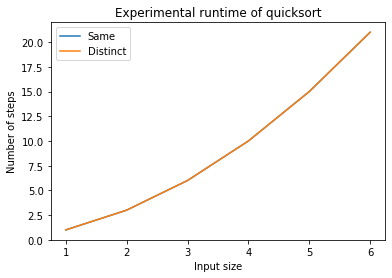

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def partition2(A,p,r):
    counter = 0
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            A[i], A[j] = A[j], A[i]
            counter +=1
    A[i+1], A[r] = A[r], A[i+1]
    return counter, (i+1)

def quick_sort2(A,p,r):
    count = 0
    if len(A) == 1:
        return A
    if p < r:
        count, q = partition2(A,p,r)
        count += quick_sort2(A,p,q-1)
        count += quick_sort2(A,q+1,r)
    return count

#loop through the quick_sort2 algorithm to create graphs
#for different input sizes
q_same, q_distinct, sample1, sample2 = [], [], [], []
for k in range(2, 10):
    sample1 = [1 for j in range(k)]
    sample2.insert(0, k)
    q_same.append(quick_sort2(sample1, 0, len(sample1)-1))
    q_distinct.append(quick_sort2(sample2, 0, len(sample2)-1))
    
#Plot the two line graphs    
plt.plot([i for i in range(1, len(q_same)-1)], q_same[0:-2], label="Same")
plt.plot([i for i in range(1, len(q_same)-1)], q_distinct[2:], label="Distinct")
plt.title('Experimental runtime of quicksort')
plt.xlabel('Input size')
plt.ylabel('Number of steps')
plt.legend(['Same','Distinct'], loc = 0)
plt.show()